<a href="https://colab.research.google.com/github/millicentwanyeki/panacea-ai-barcode/blob/main/Panacea_Pilot__Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load data
df = pd.read_csv("Panacea_Pilot_Data_Nairobi_6Weeks.csv")

# Encode categorical features
for col in ['Nurse_ID', 'Medication_Name', 'Corrective_Action_Taken']:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Convert target variable
df['Scan_Status'] = df['Scan_Status'].map({'Successful': 0, 'Mismatch': 1})

# Features and label
X = df[['Nurse_ID', 'Medication_Name', 'Corrective_Action_Taken']]
y = df['Scan_Status']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[178   0]
 [  0  22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00        22

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [59]:
df.head()


,Hospital_Name,Date,Patient_ID,Nurse_ID,IV_Dressing_Serial,Medication_Name,Scan_Time,Scan_Status,Alert_Triggered,Error_Type,Corrective_Action_Taken,Feedback
0,Nairobi Hospital (Pilot Site),2024-01-31,PAT3000,0,IVD5000,12,00:00:00,1,Yes,Wrong Medication,1,System easy to use and improved safety.
1,Nairobi Hospital (Pilot Site),2024-01-13,PAT3001,1,IVD5001,8,00:00:00,1,Yes,Wrong Medication,1,NaN
2,Nairobi Hospital (Pilot Site),2024-02-04,PAT3002,2,IVD5002,13,00:00:00,1,Yes,Dosage Error,0,NaN
3,Nairobi Hospital (Pilot Site),2024-02-07,PAT3003,3,IVD5003,11,00:00:00,1,Yes,Timing Error,1,NaN
4,Nairobi Hospital (Pilot Site),2024-02-02,PAT3004,4,IVD5004,14,00:00:00,1,Yes,Wrong Medication,0,NaN


checking for missing values

In [57]:
df.isnull().sum()


,0
Hospital_Name,0
Date,0
Patient_ID,0
Nurse_ID,0
IV_Dressing_Serial,0
Medication_Name,0
Scan_Time,0
Scan_Status,0
Alert_Triggered,0
Error_Type,0


viewing columns

In [17]:
df.columns

Index(['Hospital_Name', 'Date', 'Patient_ID', 'Nurse_ID', 'IV_Dressing_Serial',
       'Medication_Name', 'Scan_Time', 'Scan_Status', 'Alert_Triggered',
       'Error_Type', 'Corrective_Action_Taken', 'Feedback'],
      dtype='object')

In [15]:
df = pd.read_csv("Panacea_Pilot_Data_Nairobi_6Weeks.csv", encoding='utf-8')
print(df['Scan_Status'].unique())


['Mismatch' 'Successful']


Encoding the targer (Scan_Status)

In [18]:
# Convert 'Successful' to 0 and 'Mismatch' to 1
df['Scan_Status'] = df['Scan_Status'].map({'Successful': 0, 'Mismatch': 1})


Handling missing *values*

In [16]:
import pandas as pd

df = pd.read_csv("Panacea_Pilot_Data_Nairobi_6Weeks.csv", encoding="utf-8")
print(df['Scan_Status'].unique())


['Mismatch' 'Successful']


view missing values in each column

In [60]:
print(df.isnull().sum())


Hospital_Name                0
Date                         0
Patient_ID                   0
Nurse_ID                     0
IV_Dressing_Serial           0
Medication_Name              0
Scan_Time                    0
Scan_Status                  0
Alert_Triggered              0
Error_Type                 890
Corrective_Action_Taken      0
Feedback                   966
dtype: int64


feature selection & Encoding

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Drop ID/date columns and sparse columns
X = df.drop(columns=['Scan_Status', 'Patient_ID', 'Nurse_ID', 'IV_Dressing_Serial', 'Date', 'Error_Type', 'Feedback'])

# Encode target
y = df['Scan_Status']
le = LabelEncoder()
y = le.fit_transform(y)  # 'Mismatch' becomes 1, 'Successful' becomes 0 (or vice versa)

# Encode categorical features
X = X.apply(LabelEncoder().fit_transform)

# Sanity check
print(X.shape, y.shape)


(1000, 5) (1000,)


Train Test split

In [62]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [64]:
# Target as strings
y = df['Scan_Status'].astype(str)

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#  train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Confusion Matrix:
 [[178   0]
 [  0  22]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00        22

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Visualize a Random Tree from the Forest

|--- Medication_Name <= 1.50
|   |--- Corrective_Action_Taken <= 1.50
|   |   |--- class: 1.0
|   |--- Corrective_Action_Taken >  1.50
|   |   |--- class: 0.0
|--- Medication_Name >  1.50
|   |--- Corrective_Action_Taken <= 1.50
|   |   |--- class: 1.0
|   |--- Corrective_Action_Taken >  1.50
|   |   |--- class: 0.0



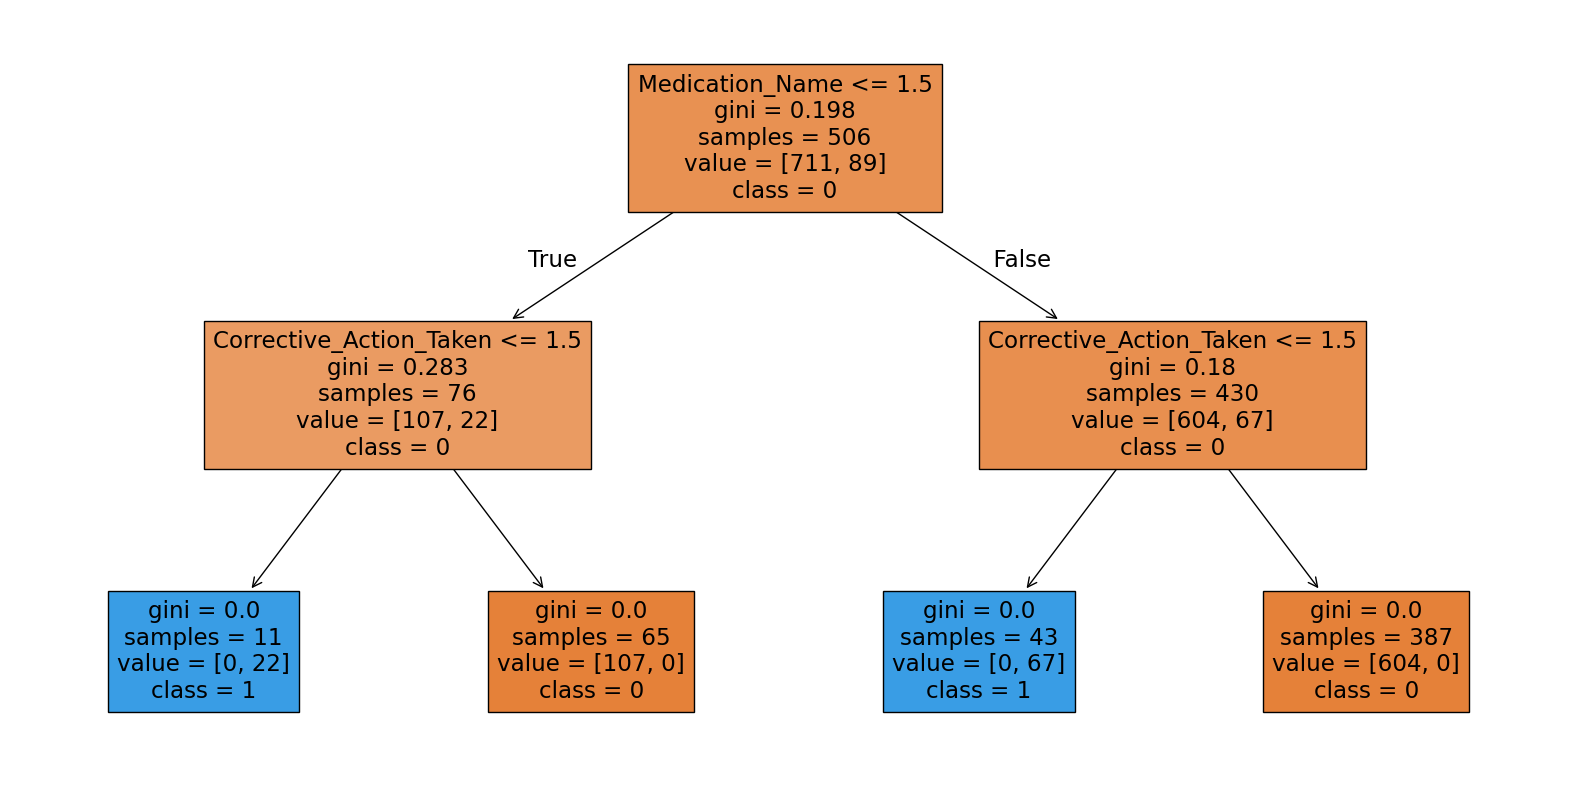

In [65]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Pick one tree from the forest
one_tree = model.estimators_[0]

tree_rules = export_text(one_tree, feature_names=list(X.columns))
print(tree_rules)

# Plot version
plt.figure(figsize=(20, 10))
plot_tree(one_tree, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()


In [66]:
from sklearn.tree import DecisionTreeClassifier

# Train a single decision tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree, target_names=le.classes_))


Confusion Matrix:
 [[178   0]
 [  0  22]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00        22

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [67]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

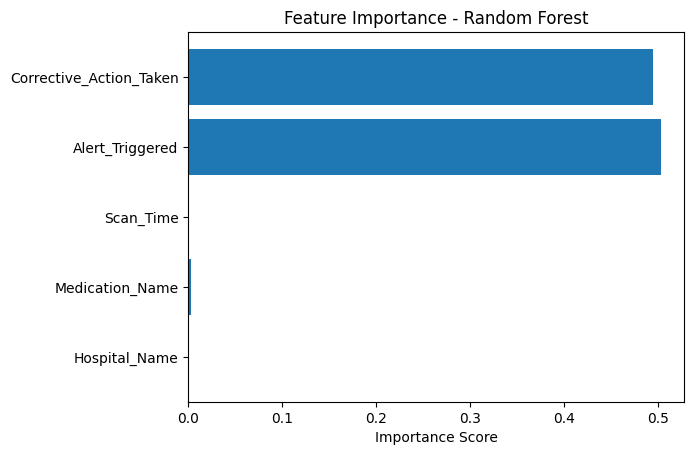

In [68]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.show()
